In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys, json, joblib
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
files = sorted(glob('./*/*/*results.json'))

In [3]:

quantum_results = []
quantum_data = []
for i in files:
    print(i)
    with open(i,'r') as f:
        data = json.load(f)
    ratio = os.path.basename(os.path.dirname(os.path.dirname(i)))
    quantum_data.append((ratio,data['R2_train'],data['R2_test']))
    quantum_results.append(('A2_HWE-CNOT',ratio,'R2_train',data['R2_train']))
    quantum_results.append(("A2_HWE-CNOT",ratio,'R2_test',data['R2_test']))

quantum_data = np.array(quantum_data).astype(float)

./0.1/A2_HWE-CNOT/A2_HWE-CNOT_results.json
./0.3/A2_HWE-CNOT/A2_HWE-CNOT_results.json
./0.5/A2_HWE-CNOT/A2_HWE-CNOT_results.json
./0.7/A2_HWE-CNOT/A2_HWE-CNOT_results.json
./0.8/A2_HWE-CNOT/A2_HWE-CNOT_results.json


In [4]:

trainsize=[ 0.1,0.3, 0.5, 0.7,0.8]
classical_models=['ridge', 'lasso', 'elastic', 'knn', 'rfr', 'grad', 'svr', 'krr', 'gpr'
]

classical_results=[]

for models in classical_models:
    for ts in trainsize:
        
        with open(f"./classical/{ts}_{models}_scores.json",'r') as f:
            classical_dict=json.load(f)
        classical_results.append((models,ts,'R2_train',classical_dict['R2_train']))
        classical_results.append((models,ts,'R2_test',classical_dict['R2_test']))
            

In [5]:
classical_df=pd.DataFrame(classical_results,columns=['model','ratio','set','value'])

In [6]:
quantum_df=pd.DataFrame(quantum_results,columns=['model','ratio','set','value'])

In [7]:
combined_df = pd.concat([classical_df,quantum_df])

In [8]:
# combined_df.pivot(columns=['set'],values='value',index=['ratio','model']).to_excel(os.path.join(os.path.expanduser('~'),'qregress/spreadsheets/DDCC5_lc.xlsx'))

print(combined_df.pivot(columns=['set'],values='value',index=['ratio','model']).sort_index(axis=1,ascending=False).round(4).to_latex(float_format="{:.4f}".format))

\begin{tabular}{llrr}
\toprule
 & set & R2_train & R2_test \\
ratio & model &  &  \\
\midrule
\multirow[t]{9}{*}{0.100000} & elastic & 0.9874 & 0.9877 \\
 & gpr & 1.0000 & 0.9997 \\
 & grad & 1.0000 & 0.9999 \\
 & knn & 1.0000 & 1.0000 \\
 & krr & 0.9999 & 0.9997 \\
 & lasso & 0.9873 & 0.9877 \\
 & rfr & 1.0000 & 0.9999 \\
 & ridge & 0.9898 & 0.9901 \\
 & svr & 0.9985 & 0.9982 \\
\cline{1-4}
\multirow[t]{9}{*}{0.300000} & elastic & 0.9873 & 0.9875 \\
 & gpr & 1.0000 & 1.0000 \\
 & grad & 1.0000 & 1.0000 \\
 & knn & 1.0000 & 1.0000 \\
 & krr & 0.9999 & 0.9999 \\
 & lasso & 0.9872 & 0.9874 \\
 & rfr & 1.0000 & 1.0000 \\
 & ridge & 0.9897 & 0.9899 \\
 & svr & 0.9990 & 0.9989 \\
\cline{1-4}
\multirow[t]{9}{*}{0.500000} & elastic & 0.9875 & 0.9875 \\
 & gpr & 1.0000 & 1.0000 \\
 & grad & 1.0000 & 1.0000 \\
 & knn & 1.0000 & 1.0000 \\
 & krr & 0.9999 & 1.0000 \\
 & lasso & 0.9875 & 0.9874 \\
 & rfr & 1.0000 & 1.0000 \\
 & ridge & 0.9899 & 0.9899 \\
 & svr & 0.9994 & 0.9994 \\
\cline{1-4}
\mu

In [9]:
for ts in trainsize:
    print(ts)
    for m in classical_models:
        cdf=classical_df[(classical_df['ratio']==ts)&(classical_df['model']==m)].set_index('set')
        qdf=quantum_df[quantum_df['ratio']==f'{ts}'].set_index('set')
        print(m,all(cdf['value']>=qdf['value']))
        if cdf['value'].loc['R2_test']>=qdf['value'].loc['R2_test']:
            print(cdf['value'].loc['R2_test'],qdf['value'].loc['R2_test'])
    print()

0.1
ridge True
0.9900660854918857 0.44342850690981306
lasso True
0.9876878443346493 0.44342850690981306
elastic True
0.9877369682397853 0.44342850690981306
knn True
0.9999870623562959 0.44342850690981306
rfr True
0.9999203646928384 0.44342850690981306
grad True
0.9998793069860874 0.44342850690981306
svr True
0.9982130436803718 0.44342850690981306
krr True
0.9997366804006855 0.44342850690981306
gpr True
0.9997345364362014 0.44342850690981306

0.3
ridge True
0.9898955971727496 0.42704375580053466
lasso True
0.9873981044512459 0.42704375580053466
elastic True
0.9874541016075401 0.42704375580053466
knn True
0.999980173989203 0.42704375580053466
rfr True
0.9999914415475303 0.42704375580053466
grad True
0.9999920598929708 0.42704375580053466
svr True
0.9988775616246782 0.42704375580053466
krr True
0.9999176233589949 0.42704375580053466
gpr True
0.9999773941097145 0.42704375580053466

0.5
ridge True
0.9899010057827928 0.8307576644493598
lasso True
0.9874455069797233 0.8307576644493598
elastic

In [10]:
combined_df = combined_df.astype({'model':str,'ratio':float,"set":str,'value':float})
combined_df['set'] = [i.split('_')[1].capitalize() for i in combined_df['set']]

train = combined_df[(combined_df['model']=='A2_HWE-CNOT')&(combined_df['set']=='Train')]
test = combined_df[(combined_df['model']=='A2_HWE-CNOT')&(combined_df['set']=='Test')]

drop_pqc = combined_df[combined_df['model']!='A2_HWE-CNOT']

In [11]:
drop_pqc.min()

model     elastic
ratio         0.1
set          Test
value    0.987237
dtype: object

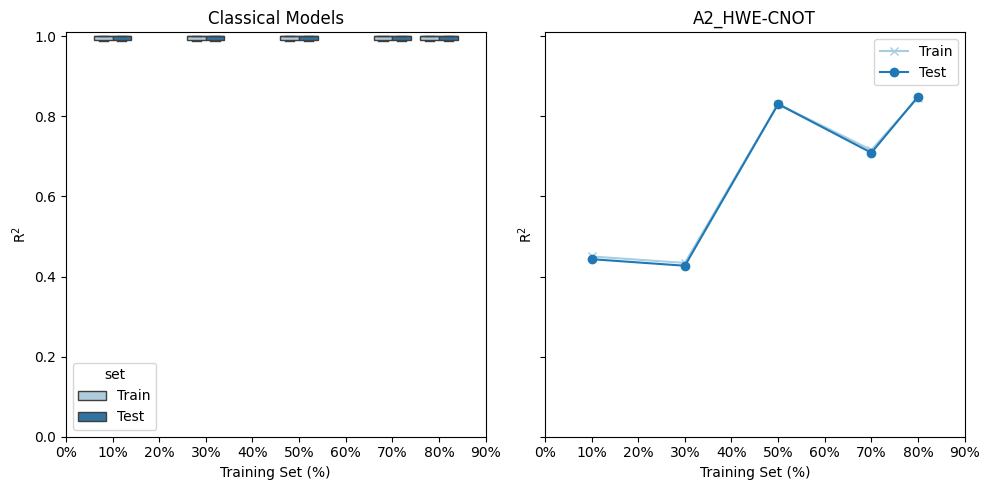

In [12]:


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5),sharey=True)

sns.boxplot(data=drop_pqc,x='ratio',y='value',hue='set', native_scale=True,ax=ax1,palette=sns.color_palette('Paired',2))

# ins = ax1.inset_axes([0.55,0.15,0.4,0.4])
# sns.boxplot(data=drop_pqc[drop_pqc['ratio']==0.1],x='ratio',y='value',hue='set', native_scale=True,palette=sns.color_palette('Paired',2),ax=ins)
# ins.set_ylim(-0.5,1.05)
# ins.set_ylabel('R$^{2}$')
# ins.set_xlabel('Training Set Ratio')
# ins.set_xticks([0.1])
# ins.get_legend().remove()

ax1.set_ylim(0,1.01)
ax1.set_xlim(0,0.9)
ax1.set_ylabel('R$^{2}$')
ax1.set_xlabel('Training Set (%)')
ax1.set_title('Classical Models')
# Convert x-axis labels to percentages
xticks = np.linspace(0, 0.9, 10)
ax1.set_xticks(xticks)
ax1.set_xticklabels([f"{int(x * 100)}%" for x in xticks])

ax2.plot(train['ratio'],train['value'],'-x',color=sns.color_palette('Paired',2)[0],label='Train')
ax2.plot(test['ratio'],test['value'],'-o',color=sns.color_palette('Paired',2)[1],label='Test')
ax2.legend()
ax2.set_xticks(xticks)
ax2.set_xticklabels([f"{int(x * 100)}%" for x in xticks])

# ax2.set_ylim(0.95,1)
ax2.set_xlim(0.0,0.9)
ax2.set_ylabel('R$^{2}$')
ax2.set_xlabel('Training Set (%)')
ax2.set_title('A2_HWE-CNOT')
plt.tight_layout()
plt.savefig(f"{os.path.expanduser('~')}/qregress/images/DDCC/DDCC_learning_curves.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [32]:
combined_df.query("model == 'A2_HWE-CNOT' & set == 'Train' ").round(4)

,model,ratio,set,value
0,A2_HWE-CNOT,0.1,Train,0.4502
2,A2_HWE-CNOT,0.3,Train,0.4341
4,A2_HWE-CNOT,0.5,Train,0.8310
6,A2_HWE-CNOT,0.7,Train,0.7162
8,A2_HWE-CNOT,0.8,Train,0.8470


In [30]:
combined_df.query("model == 'A2_HWE-CNOT' & set == 'Test' ").round(4)

,model,ratio,set,value
1,A2_HWE-CNOT,0.1,Test,0.4434
3,A2_HWE-CNOT,0.3,Test,0.4270
5,A2_HWE-CNOT,0.5,Test,0.8308
7,A2_HWE-CNOT,0.7,Test,0.7093
9,A2_HWE-CNOT,0.8,Test,0.8492


In [13]:
drop_pqc_adj = drop_pqc.copy()

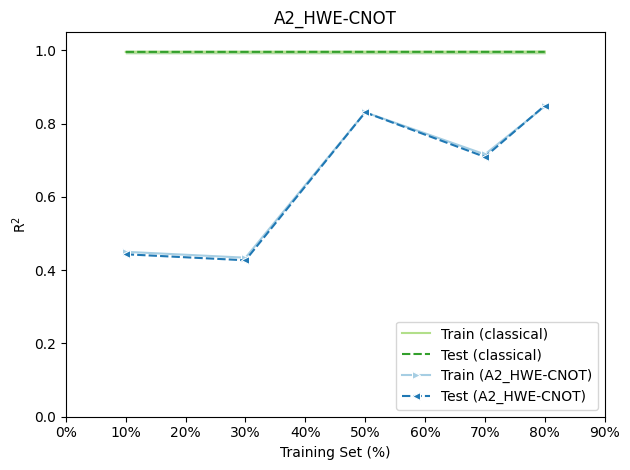

In [14]:
r_df = pd.DataFrame(quantum_data,columns=['index','Train','Test']).melt(id_vars=['index'], value_vars=['Train','Test'])
r_df['variable'] = [i+" (A2_HWE-CNOT)" for i in r_df['variable']]

drop_pqc_adj['set']=[i+" (classical)" for i in drop_pqc['set']]
sns.lineplot(data=drop_pqc_adj,x='ratio',y='value',hue='set',style='set',palette=sns.color_palette('Paired',4)[2:])

ax = sns.lineplot(r_df,x='index',y='value',hue='variable',style='variable',palette=sns.color_palette('Paired',2),markers=['>','<'])
plt.ylim(0,1.05)
# plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))  # Adjust xmax if needed
# ax.set_xtick([f"{int(float(i)*100)}%" for i in np.array(r_df['index'],dtype=float)])
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x * 100)}%" for x in xticks])

plt.ylabel('R$^{2}$')
plt.xlabel('Training Set (%)')
plt.title('A2_HWE-CNOT')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig(f"{os.path.expanduser('~')}/qregress/images/DDCC/DDCC_learning_curves.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_7113/2882272491.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


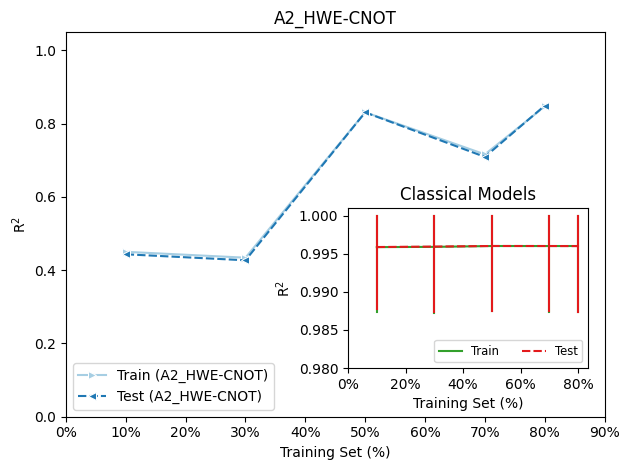

In [29]:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
drop_pqc_adj = drop_pqc.copy()
# Assuming drop_pqc_adj and quantum_data are already defined
r_df = pd.DataFrame(quantum_data, columns=['index', 'Train', 'Test']).melt(id_vars=['index'], value_vars=['Train', 'Test'])
r_df['variable'] = [i + " (A2_HWE-CNOT)" for i in r_df['variable']]

drop_pqc_adj['set'] = [i + " (classical)" for i in drop_pqc_adj['set']]

# Main plot
# ax1 = sns.lineplot(data=drop_pqc_adj, x='ratio', y='value', hue='set', style='set', palette=(sns.color_palette('Paired', 6)[3],sns.color_palette('Paired', 6)[5]),errorbar=lambda x: (x.min(), x.max()),err_style='bars')
ax = sns.lineplot(data=r_df, x='index', y='value', hue='variable', style='variable', palette=sns.color_palette('Paired', 2), markers=['>', '<'])
plt.ylim(0, 1.05)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x * 100)}%" for x in xticks])
plt.ylabel('R$^{2}$')
plt.xlabel('Training Set (%)')
plt.title('A2_HWE-CNOT')
plt.legend(loc=3)

# Inlay plot
inset_ax = inset_axes(ax, width="40%", height="40%", loc=4, bbox_to_anchor=(0, 100, 600, 400))  # Adjust location as needed

# Plot with legend temporarily enabled
sns_plot = sns.lineplot(
    data=drop_pqc_adj,
    x='ratio',
    y='value',
    hue='set',
    style='set',
    palette=(sns.color_palette('Paired', 6)[3], sns.color_palette('Paired', 6)[5]),
    errorbar=lambda x: (x.min(), x.max()),
    ax=inset_ax,
    err_style='bars',
    legend=True  # Enable legend just to capture handles
)

# Get handles and labels
handles, labels = inset_ax.get_legend_handles_labels()

# Manually reset legend with new labels
inset_ax.legend(loc=4,handles=handles, labels=["Train", "Test"], fontsize='small',ncols=2)

# Final axis formatting
inset_ax.set_ylim(0.98, 1.001)
inset_ax.set_xticks(xticks[0::2])
inset_ax.set_xticklabels([f"{int(x * 100)}%" for x in xticks[0::2]])
inset_ax.set_ylabel('R$^{2}$')
inset_ax.set_xlabel('Training Set (%)')
inset_ax.set_title('Classical Models')
plt.tight_layout()
plt.savefig(f"{os.path.expanduser('~')}/qregress/images/DDCC/DDCC_learning_curves.png", bbox_inches='tight', pad_inches=0.1)
plt.show()


In [16]:
combined_df

,model,ratio,set,value
0,ridge,0.1,Train,0.989794
1,ridge,0.1,Test,0.990066
2,ridge,0.3,Train,0.989732
3,ridge,0.3,Test,0.989896
4,ridge,0.5,Train,0.989883
...,...,...,...,...
5,A2_HWE-CNOT,0.5,Test,0.830758
6,A2_HWE-CNOT,0.7,Train,0.716175
7,A2_HWE-CNOT,0.7,Test,0.709266
8,A2_HWE-CNOT,0.8,Train,0.846975
